In [1]:
import pytesseract
import cv2

from pathlib import Path
import os
from os.path import join

from PIL import Image

In [2]:
base_path = Path(os.getcwd())
img_path = base_path/'imgs'

img_path.mkdir(exist_ok=True)



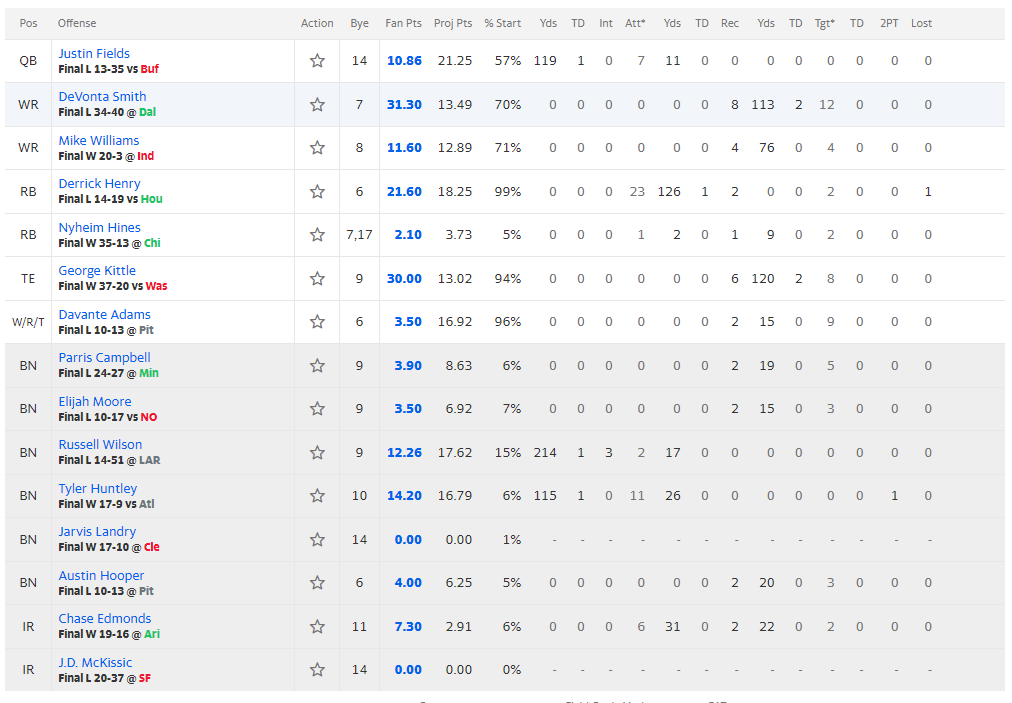

In [3]:
raw_img_path = img_path/'raw'
raw_img_path.mkdir(exist_ok=True)

file_name = 'ff_test.PNG'
raw_img_file_path = raw_img_path/file_name

image_display = Image.open(raw_img_file_path)
image_display

In [4]:
image = cv2.imread(str(raw_img_file_path))

In [5]:
# gray image

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_img_path = img_path/'gray_img'
gray_img_path.mkdir(exist_ok=True)

cv2.imwrite(str(gray_img_path/file_name),gray)

True

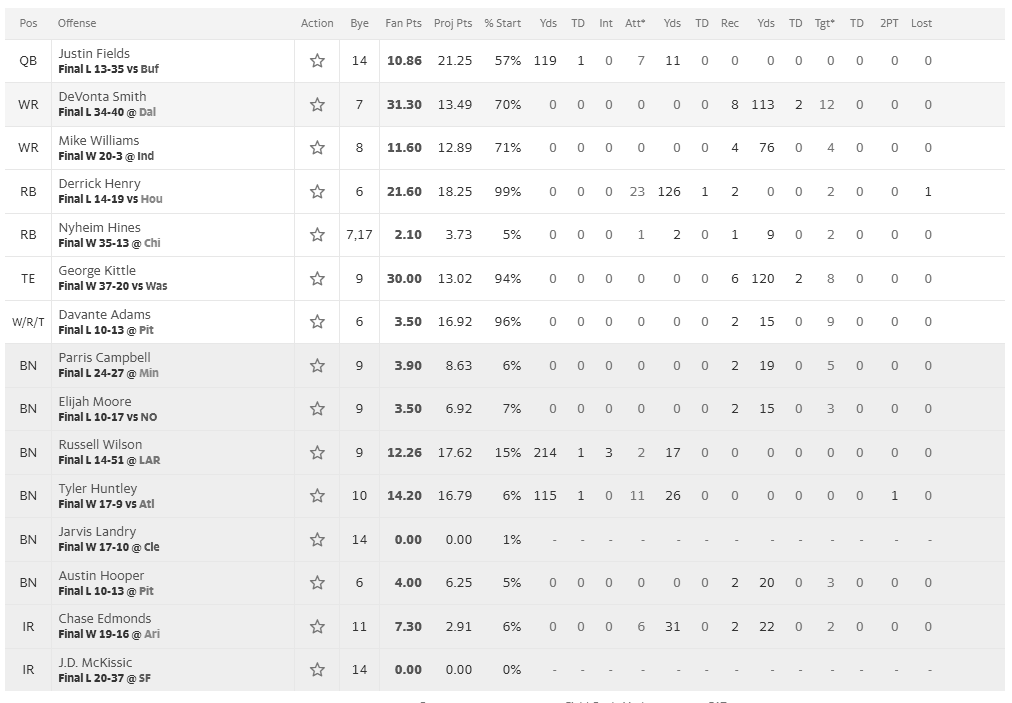

In [6]:
grey_image_display = Image.open(gray_img_path/file_name)
grey_image_display

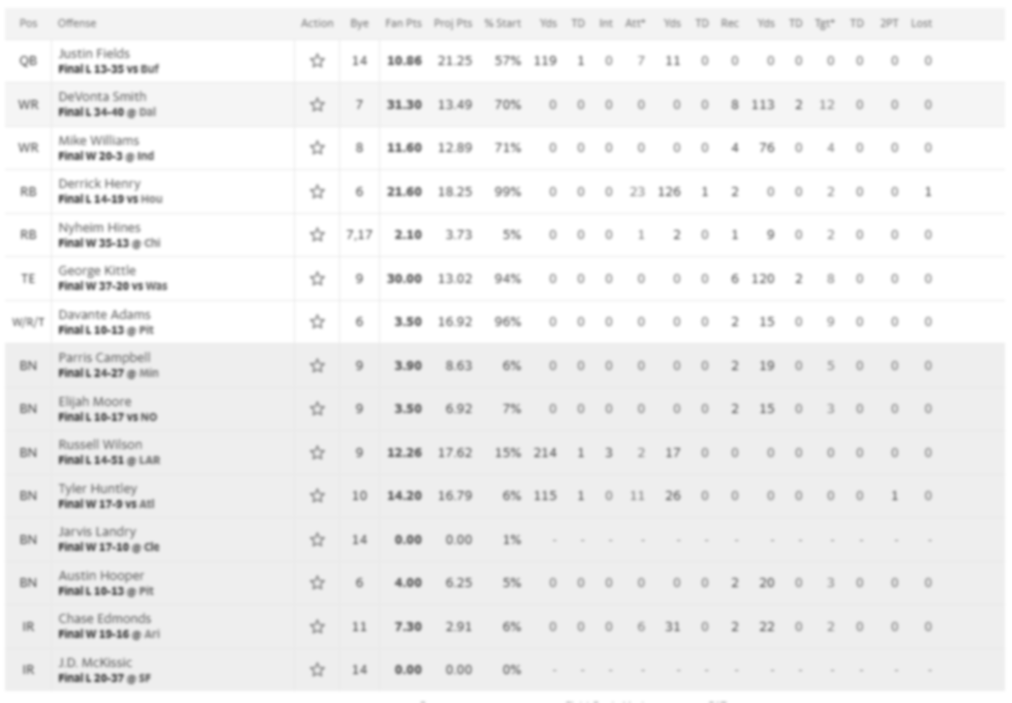

In [7]:
# blur

blur = cv2.GaussianBlur(gray,(7,7),0)
blur_img_path = img_path/'blur_img'
blur_img_path.mkdir(exist_ok=True)

cv2.imwrite(str(blur_img_path/file_name),blur)

blur_image_display = Image.open(blur_img_path/file_name)
blur_image_display

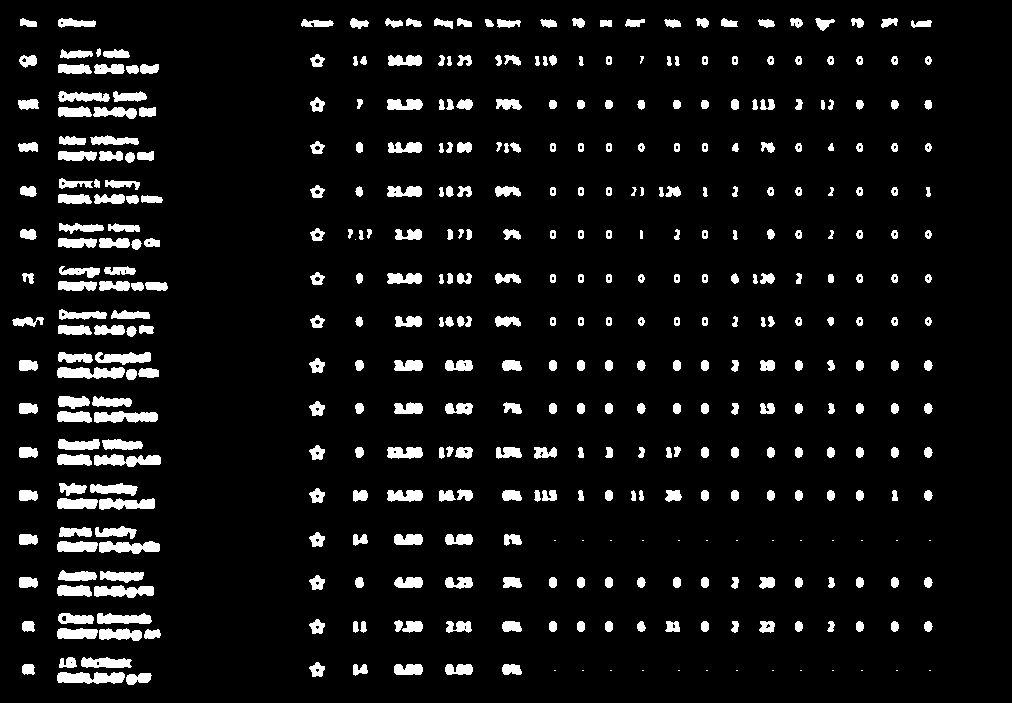

In [8]:
# threshold

thres = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

thres_img_path = img_path/'thres_img'

thres_img_path.mkdir(exist_ok=True)

cv2.imwrite(str(thres_img_path/file_name),thres)

thres_image_display = Image.open(thres_img_path/file_name)
thres_image_display

In [9]:
# kernels

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,3))

kernel_img_path = img_path/'kernel_img'
kernel_img_path.mkdir(exist_ok=True)

cv2.imwrite(str(kernel_img_path/file_name),kernel)



True

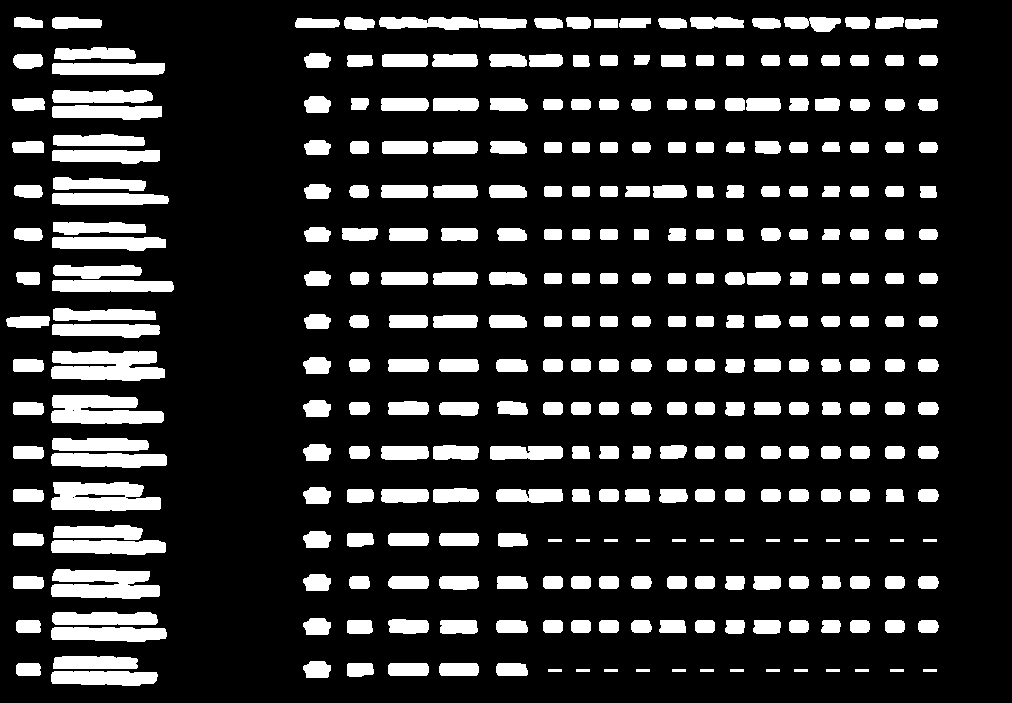

In [10]:
# dilate

dilate = cv2.dilate(thres,kernel,iterations=1)

dilate_img_path = img_path/'dilate_img'
dilate_img_path.mkdir(exist_ok=True)

cv2.imwrite(str(dilate_img_path/file_name),dilate)

dilate_image_display = Image.open(dilate_img_path/file_name)
dilate_image_display

In [11]:
# contours

cnts = cv2.findContours(dilate,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts,key=lambda x: cv2.boundingRect(x)[0])

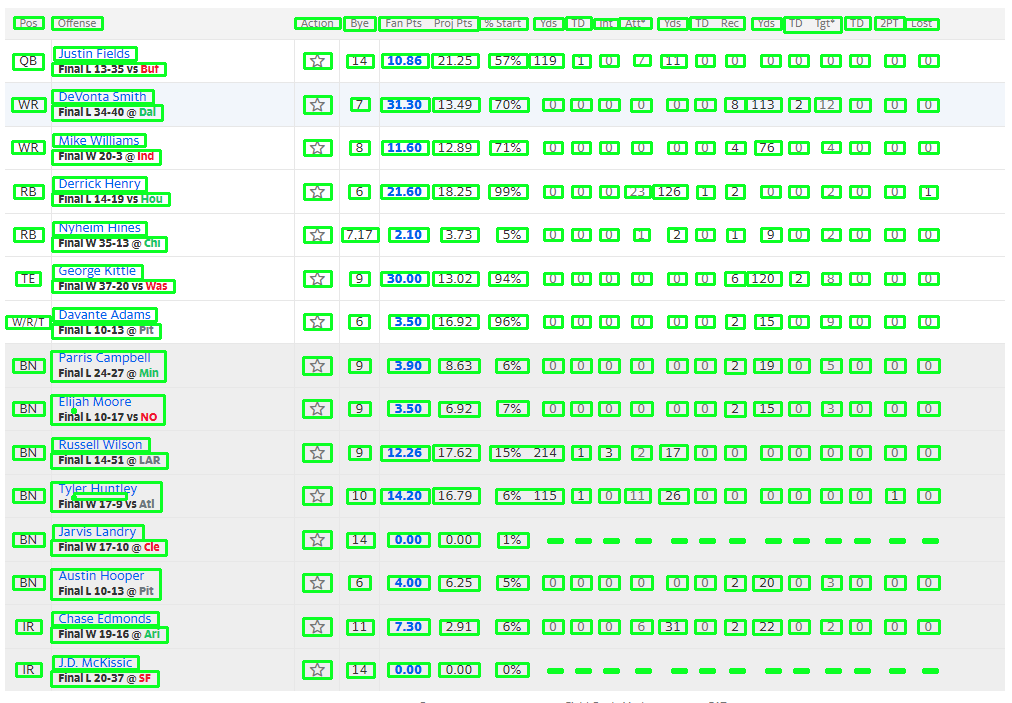

In [12]:
# draw contours

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
    
bbox_img_path = img_path/'bbox_img'
bbox_img_path.mkdir(exist_ok=True)
cv2.imwrite(str(bbox_img_path/file_name),image)


bbox_img = Image.open(bbox_img_path/file_name)
bbox_img

In [13]:
ocr_result = pytesseract.image_to_string(bbox_img)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.